# Table of Contents
### 0. [Introduction and General Information](#0)
### 1. [Importing Libraries](#1) 
### 2. [Importing Data](#2)
### 3. [EDA](#3)        
  * 3.1 [Basic informations](#3a)
      * 3.1.1 [Size](#3a1)
      * 3.1.2 [Null Values](#3a2)
      * 3.1.3 [Data types](#3a3)
      * 3.1.4 [Values of `Flag`](#3a4)
      * 3.1.5 [Descriptive Statistics](#3a5)
  * 3.2 [Handling Outliers](#3b)
### 4. [Logistic Regression](#4)




<a id=0></a>
# 0. Introduction and General Information

The primary objective of this exploratory data analysis is to discern the key factors influencing variations in the `Flag` column.

The dataset comprises information regarding users exposed to visual stimuli, with the `Flag` column indicating whether a user has previously encountered a particular object or not. The analysis aims to uncover patterns, correlations, and significant contributors that explain the fluctuations observed in the `Flag` column. 

The data collection process utilized [Mindwave Mobile 2](https://www.amazon.com/NeuroSky-MindWave-Mobile-Brainwave-Starter/dp/B07CXN8NKX/ref=sr_1_1?keywords=neurosky+mindwave+mobile+2&qid=1701273537&sr=8-1). According to its documentation, the device not only provides raw data on the user's current brainwaves but also includes three additional columns:
- `Meditation`
- `BlinkStrength`
- `Attention`

These supplementary columns offer valuable insights into the user's mental state. Incorporating this information into the analysis could provide a more holistic understanding of the factors influencing the observed patterns in the dataset.


<a id=1></a>
# 1. Importing Libraries

In this section, we will import essential libraries for data manipulation and visualization. Additionally, we will incorporate additional packages required for the creation and evaluation of our logistic regression model.

In [1]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# Data vizualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Libraries needed for logistic regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


<a id=2></a>
# 2. Importing Data

In [2]:
# Since the `read_csv` function did not catch that the seprator is a semicolon and not a comma we change it manually using `sep`.

data = pd.read_csv("autentykacja_eeg.csv", sep = ";", header=0)

In [3]:
# Checking correctness of an import
data.head(10)

Delta   Theta  Alpha_low  Alpha_high  Beta_low  Beta_high  Gamma_low  \
0  785389  114375      57106       37625     24464      17104      15846   
1  386949   80792      23506       22118      9566       7147       5392   
2   21453   14085       4756        5062      2176       2117       2867   
3  322637   56936      17810       25793     15870       8050       3621   
4   19412   12985       6416        6131      7126       7419       2677   
5  164792   18239       6366        3878      2854       2890       3037   
6   60284    8809       2827        2599      2970       6319       4137   
7    7468   29038       7696       10410      7955       6836       2420   
8   98384   63901      13367        8150      4140       4984       2227   
9   61174   23717      22419       23084      5549      10078       3420   

   Gamma_high  Attention  Meditation  BlinkStrength  Flag  
0        8024         45          91             15     1  
1        1697          8          42              6     0  
2         862         48          66              9     1  
3        2100         25          69              8     0  
4        1884         80          53             -1     1  
5        1909         58          69             -1     1  
6        3169         76          45              6     0  
7        1257         59          45             -1     1  
8        1097         29          60             24     1  
9        1918         77          95             -1     1

Having gained visibility into all columns within our dataset, let us pause for a moment to contemplate the significance of the data.

The initial eight columns encapsulate diverse recordings of brainwaves. It is imperative to delve into the specifics of these columns to discern the nature and implications of the recorded numerical values.

| Wave | Frequence | Subjective feeling states | Associated tasks & behaviors | Physiological correlates | Effects of training |
| :-----: | :-----: | :-----: | :-----: |  :-----: |  :-----: | 
| Delta | 0.1 to 3.5 Hz | deep, dreamless sleep, non-REM sleep, trance, unconscious | lethargic, not moving, not attentive | not moving, low-level of arousal | can induce drowsiness, trance, deeply relaxed states|
| Theta | 4 to 8 Hz | intuitive, creative, recall, fantasy, imagery, creative, dreamlike, switching thoughts, drowsy; “oneness”, “knowing” | creative, intuitive; but may also be distracted, unfocused | healing, integration of mind/body |  if enhanced, can induce drifting, trance-like state. If suppressed, can improve concentration, ability to focus attention |
| Alpha | 8 to 12 Hz | relaxed, not agitated, but not drowsy; tranquil, conscious | meditation, no action | relaxed, healing | can produce relaxation |
| Beta | 13 - 30 Hz | thinking, aware of self & surroundings | mental activity | alert, active, but not agitated | can increase mental ability, focus, alertness |
| Gamma | above 30 Hz | integrated thoughts | high-level information processing, “binding” |associated with information-rich task processing | not known

[Source (link)](https://nhahealth.com/brainwaves-the-language/)

Let's dig deeper `Meditation` and `Attention` columns by looking into [documentation](https://developer.neurosky.com/docs/doku.php?id=mindwave)

> eSense™ is a NeuroSky's proprietary algorithm for characterizing mental states [...]
> For each different type of eSense (i.e. Attention, Meditation), the meter value is reported on a relative
eSense scale of 1 to 100. On this scale, a value between 40 to 60 at any given moment in time is considered “neutral” and is similar in notion to “baselines” that are established in conventional brainwave
measurement techniques (though the method for determining a inkGear baseline is proprietary and
may differ from conventional brainwaves).

> A value from 60 to 80 is considered “slightly elevated”, and may be interpreted as levels tending to
be higher than normal (levels of Attention or Meditation that may be higher than normal for a given
person). Values from 80 to 100 are considered “elevated”, meaning they are strongly indicative of
heightened levels of that eSense.

> Similarly, on the other end of the scale, a value between 20 to 40 indicates “reduced” levels of the
eSense, while a value between 1 to 20 indicates “strongly lowered” levels of the eSense. These levels
may indicate states of distraction, agitation, or abnormality, according to the opposite of each eSense

Thanks to all of this information we are ready to start EDA procces

<a id=3></a>
# 3. EDA

Exploratory Data Analysis, commonly known as EDA, is the process of systematically collecting and extracting comprehensive information from data. It involves a thorough examination of the dataset to uncover patterns, trends, relationships, and potential outliers. The primary goal is to gain valuable insights, identify data characteristics, and inform subsequent analyses or modeling efforts. EDA plays a crucial role in understanding the nature of the data, guiding feature selection, and facilitating informed decision-making in the data analysis process.

EDA encompasses procedures like:

* Data Collection and Cleaning
* Uncovering Patterns and Trends
* Identifying Relationships
* Handling Outliers
* Summary Statistics
* Data Visualization
* Decision-Making


<a id="3a"></a>
## Basic Informations

<a id="3a1"></a>
### Size
Dataset contains 5244 rows and 12 columns 


In [4]:
data.shape

(5244, 12)

<a id="3a2"></a>
### Null Values
There are no null values

In [5]:
data.isna().sum()

Delta            0
Theta            0
Alpha_low        0
Alpha_high       0
Beta_low         0
Beta_high        0
Gamma_low        0
Gamma_high       0
Attention        0
Meditation       0
BlinkStrength    0
Flag             0
dtype: int64

<a id="3a3"></a>
### Data types
All twelve columns are type `int64`

In [6]:
data.dtypes

Delta            int64
Theta            int64
Alpha_low        int64
Alpha_high       int64
Beta_low         int64
Beta_high        int64
Gamma_low        int64
Gamma_high       int64
Attention        int64
Meditation       int64
BlinkStrength    int64
Flag             int64
dtype: object

<a id="3a4"></a>
### Values of `Flag`


In [7]:
plt.pie(data['Flag'].value_counts(), explode=[0.1, 0.1], labels = ['Flag = 1',"Flag = 0"],autopct='%.2f%%')

([<matplotlib.patches.Wedge at 0x1f5fbcabe00>,
 [Text(-0.37464714872135135, 1.1400173305502692, 'Flag = 1'),
  Text(0.37464714872135096, -1.1400173305502694, 'Flag = 0')],
 [Text(-0.21854417008745491, 0.665010109487657, '60.11%'),
  Text(0.2185441700874547, -0.665010109487657, '39.89%')])

<a id="3a5"></a>
### Descriptive statistics
Let's use `.describe()` method to see some basic descriptive statistics.

In [8]:
data.describe()

Delta          Theta      Alpha_low     Alpha_high  \
count  5.244000e+03    5244.000000    5244.000000    5244.000000   
mean   3.090832e+05   63344.774981   15912.476735   13478.048818   
std    3.095886e+05   65368.306706   16146.452270   12358.799228   
min    4.584000e+03    4307.000000    1417.000000    1223.000000   
25%    7.401125e+04   24484.250000    6686.000000    6461.750000   
50%    1.933350e+05   40572.000000   10867.000000    9740.000000   
75%    4.655525e+05   79836.000000   18803.000000   16006.750000   
max    1.840855e+06  690442.000000  168356.000000  149180.000000   

            Beta_low      Beta_high     Gamma_low    Gamma_high    Attention  \
count    5244.000000    5244.000000   5244.000000   5244.000000  5244.000000   
mean    10837.555873    8553.934973   6003.355263   2987.525934    51.652365   
std     10751.971186    8084.039432   5821.807357   2820.326823    16.511836   
min      1104.000000    1181.000000    558.000000    251.000000     1.000000   
25%      5439.000000    4510.000000   2676.750000   1402.000000    40.000000   
50%      8004.000000    6598.000000   4307.000000   2160.000000    52.000000   
75%     12370.250000    9852.000000   7239.750000   3526.000000    63.000000   
max    167349.000000  173909.000000  66565.000000  27786.000000   100.000000   

        Meditation  BlinkStrength         Flag  
count  5244.000000    5244.000000  5244.000000  
mean     58.632151      11.547292     0.601068  
std      15.025158      14.779718     0.489725  
min       1.000000      -1.000000     0.000000  
25%      49.000000      -1.000000     0.000000  
50%      59.000000       8.000000     1.000000  
75%      69.000000      18.000000     1.000000  
max      99.000000     100.000000     1.000000

Upon closer examination, it becomes evident that there might be anomalies in the data. Notably, when scrutinizing the differences between quartiles, a distinct pattern emerges: the disparities between the maximum values and the 75th percentile in certain columns surpass those between the 50th and 25th percentiles for example. This discrepancy raises concerns and prompts the need for a thorough investigation. Identifying the root cause of these variations is crucial, as it could signify the presence of outliers or irregularities in the dataset. Consequently, a comprehensive investigation is warranted to ensure data integrity and reliability in subsequent analyses.

<a id="3b"></a>
## Handling outliers

In [9]:
# Creating a DataFrame for quantiles
def dbq(data):
    data_by_quantiles = pd.DataFrame()
    for x in range(100,0,-1):
        data_by_quantiles = pd.concat([data_by_quantiles,pd.DataFrame(data.quantile(x/100)).transpose()])
    return data_by_quantiles
data_by_quantiles = dbq(data)
data_by_quantiles.head(25)

Delta      Theta  Alpha_low  Alpha_high   Beta_low  Beta_high  \
1.00  1840855.00  690442.00  168356.00   149180.00  167349.00  173909.00   
0.99  1311744.31  321687.68   87658.91    60481.21   55325.07   40614.02   
0.98  1170196.64  261896.58   67084.06    48843.88   41498.28   31974.28   
0.97  1084727.73  223130.36   56091.88    42862.57   33153.42   25596.67   
0.96  1019529.92  203338.88   49291.88    37818.44   29604.96   22367.28   
0.95   964492.40  185135.15   45097.50    34442.40   27262.55   20173.70   
0.94   913570.60  170581.24   40865.00    32084.36   24715.16   18890.66   
0.93   864652.09  159394.95   38575.14    30308.75   23382.96   17799.88   
0.92   833165.28  147268.72   36708.32    28762.36   22105.56   16690.80   
0.91   796403.68  139310.33   33973.32    27285.56   21150.93   15823.04   
0.90   764049.80  133219.70   32520.60    25912.40   20125.20   15125.90   
0.89   729962.54  128026.15   30920.83    24595.07   19439.18   14391.27   
0.88   700653.80  123067.80   29311.72    23731.68   18517.52   13823.64   
0.87   677266.90  118189.92   28161.32    22754.42   17753.82   13335.46   
0.86   655022.62  113303.36   26804.68    22042.00   16970.00   13033.82   
0.85   631917.50  109255.65   25843.15    21203.15   16418.10   12639.00   
0.84   610986.76  105035.56   24940.12    20531.00   15881.36   12136.96   
0.83   591241.14  101715.36   24156.46    20057.73   15284.66   11826.38   
0.82   574747.10   98642.38   23349.52    19325.08   14839.26   11535.12   
0.81   553896.74   95163.19   22707.15    18785.60   14336.83   11258.32   
0.80   534457.00   92113.00   22048.40    18244.40   13977.00   10978.80   
0.79   523321.07   89237.86   21198.52    17760.97   13577.46   10748.94   
0.78   507430.68   86416.60   20621.32    17285.02   13134.08   10425.02   
0.77   493566.06   83933.10   19932.63    16822.66   12880.22   10204.44   
0.76   479903.44   82183.64   19363.68    16530.08   12590.80   10036.04   

      Gamma_low  Gamma_high  Attention  Meditation  BlinkStrength  Flag  
1.00   66565.00    27786.00     100.00       99.00          100.0   1.0  
0.99   30993.37    15221.90      89.00       91.00           62.0   1.0  
0.98   24090.26    11578.58      85.14       88.00           54.0   1.0  
0.97   19757.30     9605.81      83.00       85.71           49.0   1.0  
0.96   17167.64     8618.00      81.00       84.00           45.0   1.0  
0.95   15691.50     7837.70      79.00       82.00           41.0   1.0  
0.94   14434.74     7247.68      77.00       81.00           38.0   1.0  
0.93   13588.97     6690.65      76.00       79.00           36.0   1.0  
0.92   12702.32     6320.00      75.00       78.00           34.0   1.0  
0.91   12111.43     5997.00      74.00       78.00           32.0   1.0  
0.90   11506.80     5706.00      73.00       77.00           31.0   1.0  
0.89   10991.89     5490.62      72.00       76.00           30.0   1.0  
0.88   10573.36     5237.84      71.00       76.00           29.0   1.0  
0.87   10157.41     4957.64      70.00       75.00           28.0   1.0  
0.86    9752.76     4811.92      69.00       74.00           27.0   1.0  
0.85    9430.00     4650.55      69.00       74.00           26.0   1.0  
0.84    9113.36     4511.48      68.00       73.00           24.0   1.0  
0.83    8891.14     4345.59      67.00       73.00           24.0   1.0  
0.82    8637.52     4225.52      67.00       72.00           23.0   1.0  
0.81    8432.00     4115.32      66.00       72.00           22.0   1.0  
0.80    8212.40     4004.00      66.00       71.00           21.0   1.0  
0.79    7906.94     3889.85      65.00       71.00           21.0   1.0  
0.78    7747.94     3799.08      65.00       70.00           20.0   1.0  
0.77    7572.00     3689.00      64.00       70.00           20.0   1.0  
0.76    7411.04     3606.72      63.00       69.00           19.0   1.0

We can clearly see that something may be wrong, just look at the difference between two greatest quantiles. To interpret data easier lets visualize it.

In [10]:
# This is a fuction for plotting our data, using it we should discover things like distribution of our data
def plotter(data: pd.DataFrame, colnames: list, type_of_plot: str, show_mean: bool = True, dont_plot: list = [], hue: pd.Series = False) -> tuple:
    '''
    Creates a plot on one figure defined by the user.

    Args:
        data (pd.DataFrame): Data to be plotted.
        colnames (list): Names of columns in data to be plotted.
        type_of_plot (str): Kind of plot to be created (one included in plot_table variable).
        show_mean (bool): Decides whether plot should show an additional mean line (default: True).
        dont_plot (list): A list of column names not to be plotted (default: empty list).

    Returns:
        tuple: Figure and axes of the created plot.
    '''

    # Remove columns in dont_plot from colnames
    colnames = list(set(colnames) - set(dont_plot))

    # Create a subplot with len(colnames) rows and 1 column
    fig, axes = plt.subplots(ncols=1, nrows=len(colnames), figsize=(20, 50))

    # Dictionary of plot types and corresponding seaborn functions
    plot_table = {'scatterplot': sns.scatterplot, 'histplot': sns.histplot, 'boxplot': sns.boxplot}

    # Iterate through columns and create plots
    for column in colnames:
        index = colnames.index(column)
        plot_table[type_of_plot](x=data[column], ax=axes[index], hue = hue)
        axes[index].ticklabel_format(style='plain', axis='x')

        # Add mean line if show_mean is True
        if show_mean:
            axes[index].axvline(x=data[column].mean(), color='red', linestyle='--')

        axes[index].title.set_text(f'{column} Histogram, Mean = {np.round(data[column].mean(), 2)}')

    plt.tight_layout()
    plt.show()
    return fig, axes

In [11]:
def subplotter(data_by_quantiles):
    fig, axes = plt.subplots(4,2,figsize = (20,20))
    sec_ind = 0
    index = 0
    change_flag = True
    for i in range(8):
        if i > 3 and change_flag:
            index = index - 4
            sec_ind = 1
            change_flag = False
        sns.lineplot(data_by_quantiles.iloc[:,i],ax=axes[index,sec_ind])
        index+=1

    fig.suptitle('Line plots for each quantile quantiles')
    plt.tight_layout()
    return fig, axes

subplotter(data_by_quantiles)


(<Figure size 2000x2000 with 8 Axes>,
 array([[<Axes: ylabel='Delta'>, <Axes: ylabel='Beta_low'>],
        [<Axes: ylabel='Theta'>, <Axes: ylabel='Beta_high'>],
        [<Axes: ylabel='Alpha_low'>, <Axes: ylabel='Gamma_low'>],
        [<Axes: ylabel='Alpha_high'>, <Axes: ylabel='Gamma_high'>]],
       dtype=object))

The observation reveals a substantial surge in column values as they approach the maximum threshold. This phenomenon could stem from various factors, such as potential data collection errors or device malfunctions. Regardless of the cause, addressing these outliers is imperative to ensure the integrity and reliability of the dataset. A comprehensive strategy for handling these anomalies should be implemented to mitigate any adverse impact on subsequent analyses or model development.

To validate our observations, let's construct boxplots, a powerful visualization tool that provides additional insights, particularly in the identification of outliers. This graphical representation will offer a clearer picture of the distribution of values in each column, aiding in the confirmation and further examination of potential outliers.

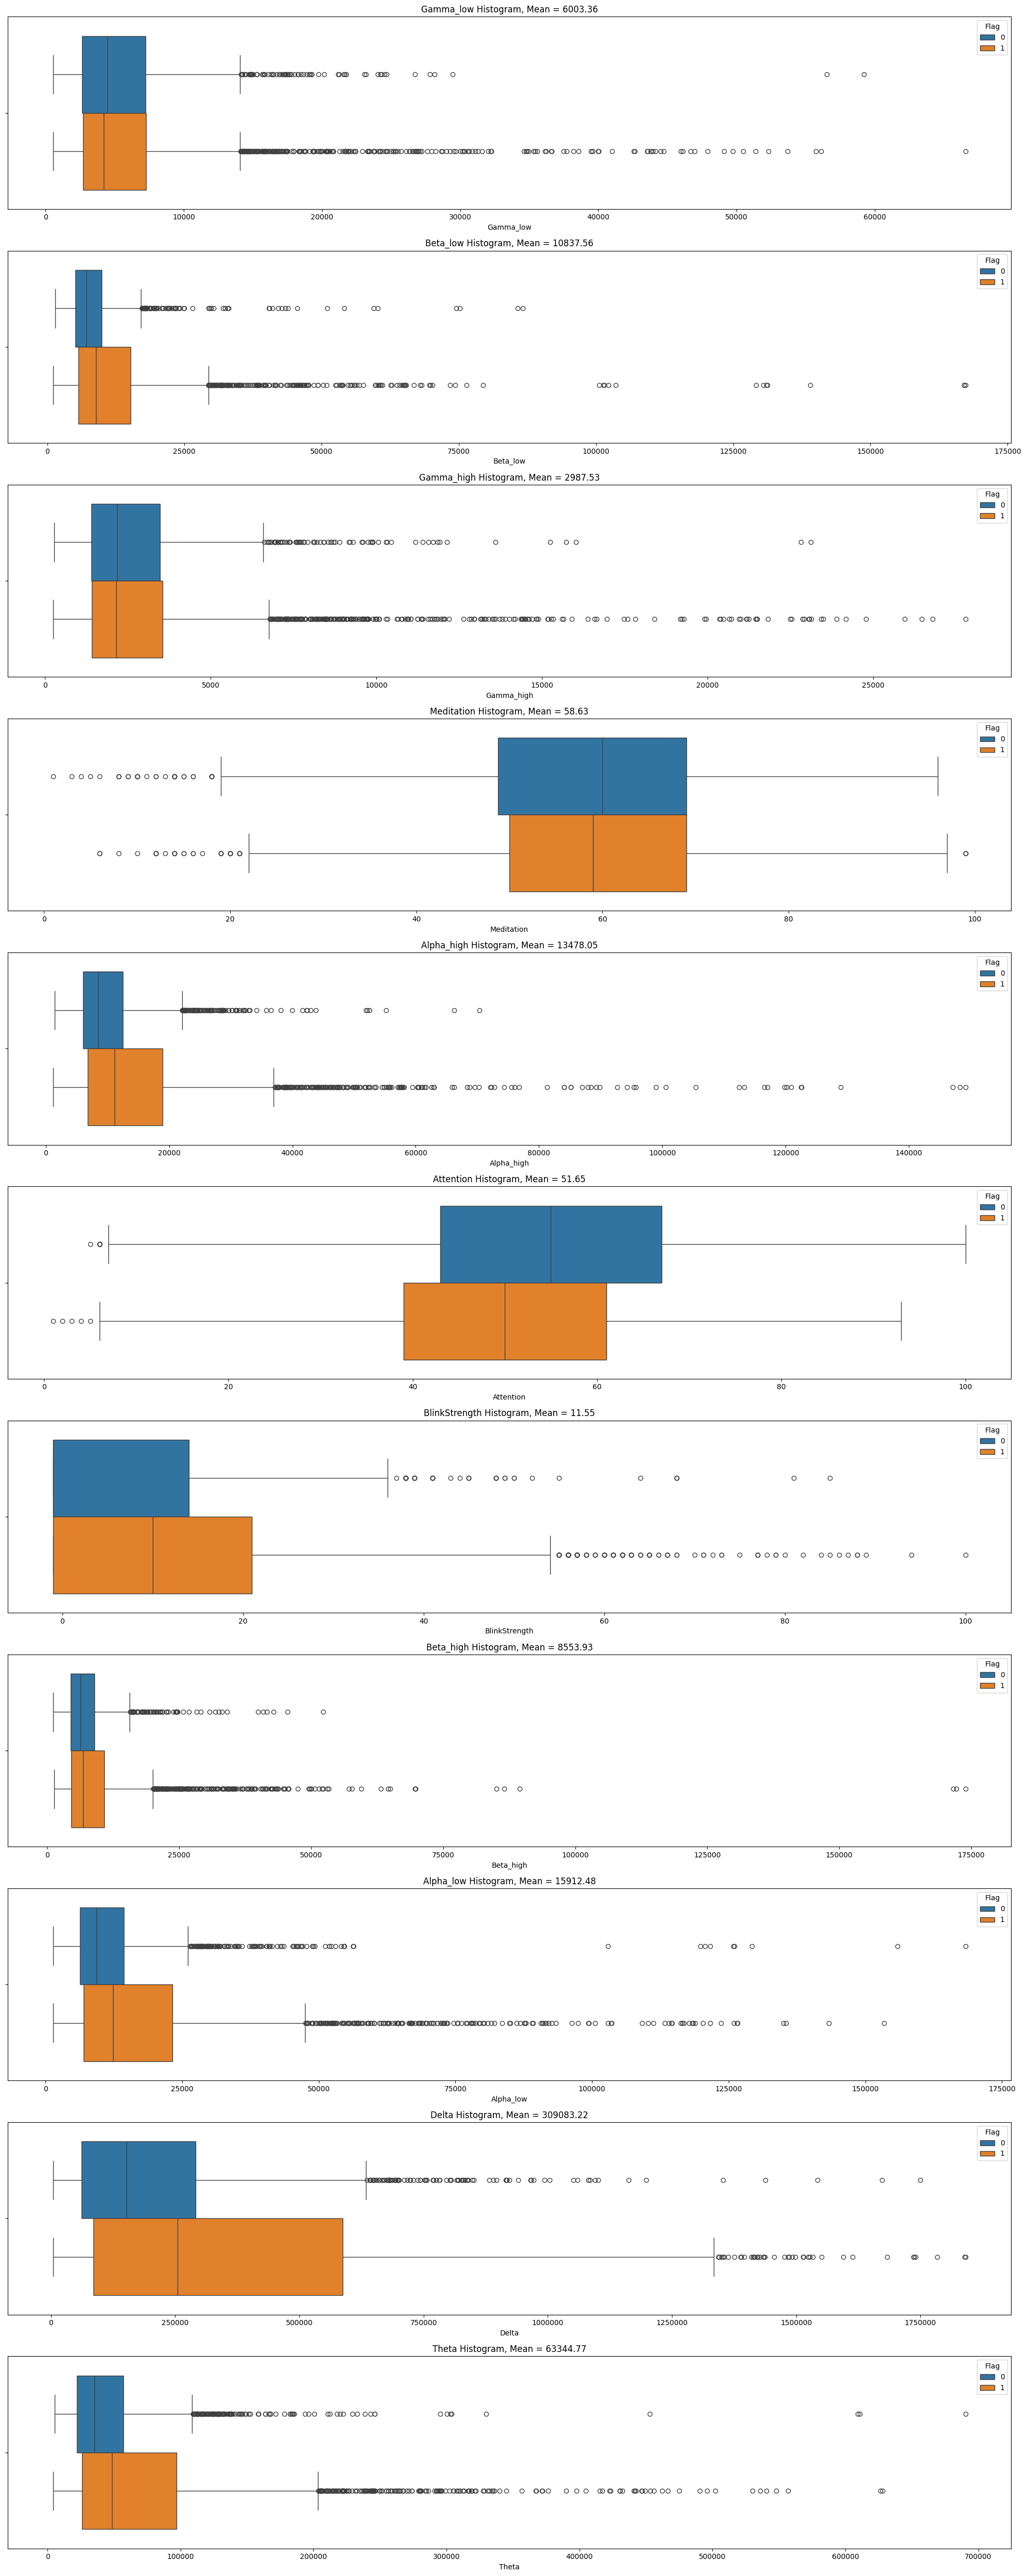

(<Figure size 2000x5000 with 11 Axes>,
 array([<Axes: title={'center': 'Gamma_low Histogram, Mean = 6003.36'}, xlabel='Gamma_low'>,
        <Axes: title={'center': 'Beta_low Histogram, Mean = 10837.56'}, xlabel='Beta_low'>,
        <Axes: title={'center': 'Gamma_high Histogram, Mean = 2987.53'}, xlabel='Gamma_high'>,
        <Axes: title={'center': 'Meditation Histogram, Mean = 58.63'}, xlabel='Meditation'>,
        <Axes: title={'center': 'Alpha_high Histogram, Mean = 13478.05'}, xlabel='Alpha_high'>,
        <Axes: title={'center': 'Attention Histogram, Mean = 51.65'}, xlabel='Attention'>,
        <Axes: title={'center': 'BlinkStrength Histogram, Mean = 11.55'}, xlabel='BlinkStrength'>,
        <Axes: title={'center': 'Beta_high Histogram, Mean = 8553.93'}, xlabel='Beta_high'>,
        <Axes: title={'center': 'Alpha_low Histogram, Mean = 15912.48'}, xlabel='Alpha_low'>,
        <Axes: title={'center': 'Delta Histogram, Mean = 309083.22'}, xlabel='Delta'>,
        <Axes: title={'cente

In [12]:
plotter(data, data.columns, 'boxplot', dont_plot = ['Flag'], show_mean = False, hue = data['Flag'] )


The boxplots unmistakably reveal the presence of numerous outliers towards the higher end of our dataset. This confirms our earlier observation and underscores the need for a robust strategy to address these outliers effectively. Handling these extreme values is crucial to maintain the accuracy and reliability of our data analysis and modeling processes.

In [13]:
plotter(data, data.columns, 'histplot', show_mean = True, dont_plot = ['Flag', 'Attention', 'BlinkStrength', 'Meditation'])

(<Figure size 2000x5000 with 8 Axes>,
 array([<Axes: title={'center': 'Gamma_low Histogram, Mean = 6003.36'}, xlabel='Gamma_low', ylabel='Count'>,
        <Axes: title={'center': 'Beta_low Histogram, Mean = 10837.56'}, xlabel='Beta_low', ylabel='Count'>,
        <Axes: title={'center': 'Gamma_high Histogram, Mean = 2987.53'}, xlabel='Gamma_high', ylabel='Count'>,
        <Axes: title={'center': 'Alpha_high Histogram, Mean = 13478.05'}, xlabel='Alpha_high', ylabel='Count'>,
        <Axes: title={'center': 'Beta_high Histogram, Mean = 8553.93'}, xlabel='Beta_high', ylabel='Count'>,
        <Axes: title={'center': 'Alpha_low Histogram, Mean = 15912.48'}, xlabel='Alpha_low', ylabel='Count'>,
        <Axes: title={'center': 'Delta Histogram, Mean = 309083.22'}, xlabel='Delta', ylabel='Count'>,
        <Axes: title={'center': 'Theta Histogram, Mean = 63344.77'}, xlabel='Theta', ylabel='Count'>],
       dtype=object))

The histogram further accentuates the prevalence of a multitude of exceptionally high values in our dataset. This distribution pattern underscores the significance of addressing these high values, as they have the potential to impact the overall statistical characteristics and interpretation of the data. Careful consideration and appropriate handling of these elevated values are essential for ensuring the validity and trustworthiness of our analytical outcomes.

Before proceeding with further analysis, it is prudent to remove the identified outliers. This step aims to enhance the overall quality and reliability of our dataset by eliminating data points that deviate significantly from the general trend. By doing so, we can mitigate the potential influence of outliers on statistical measures and ensure a more accurate representation of the underlying patterns in the data.

In [14]:
def drop_quantile(data, quant, dont_drop):
    """
    Deletes values above the specified quantile for each column in the DataFrame, excluding specified columns.

    Parameters:
    - data (DataFrame): The input pandas DataFrame.
    - quant (float): The quantile value (between 0 and 1) above which values will be dropped.
    - dont_drop (list): List of column names to be excluded from dropping.

    Returns:
    - DataFrame: A new DataFrame with values above the specified quantile removed for applicable columns.

    Example:
    ```python
    import pandas as pd

    # Sample DataFrame
    data = pd.DataFrame({
        'A': [1, 2, 3, 4, 5],
        'B': [10, 20, 30, 40, 50],
        'C': [100, 200, 300, 400, 500]
    })

    # Columns to exclude from dropping
    dont_drop = ['B']

    # Drop values above the 0.8 quantile for columns not in 'dont_drop'
    new_data = drop_quantile(data, 0.8, dont_drop)
    ```

    Output:
    ```
    Dropped 2 rows (40.0%)
    ```

    Note:
    - This function modifies the input DataFrame in-place, removing rows where values exceed the specified quantile for applicable columns.
    - The percentage of dropped rows is calculated and printed as output.

    """
    before_dropping = data.shape

    # Iterate over columns
    for x in data.columns:
        if x in dont_drop:
            continue

        # Drop rows where values exceed the specified quantile
        data = data[data[x] < data[x].quantile(quant)]

    after_dropping = data.shape
    dropped = before_dropping[0] - after_dropping[0]

    # Print information about dropped rows
    print(f'Dropped {dropped} rows ({np.round(dropped/before_dropping[0]*100, 2)}%)')

    return data

data = drop_quantile(data, 0.99, ['Flag','Attention','Meditation'])


Dropped 463 rows (8.83%)


Certainly, after removing the outliers, let's generate visual representations of the data once again. By comparing these new plots to the previous ones, we can assess the impact of outlier removal on the distribution and patterns within the dataset. This iterative visualization will provide insights into how the data has been refined and whether the removal of outliers has resulted in a more accurate representation of the underlying trends.

In [15]:
data_by_quantiles = dbq(data)
subplotter(data_by_quantiles)

(<Figure size 2000x2000 with 8 Axes>,
 array([[<Axes: ylabel='Delta'>, <Axes: ylabel='Beta_low'>],
        [<Axes: ylabel='Theta'>, <Axes: ylabel='Beta_high'>],
        [<Axes: ylabel='Alpha_low'>, <Axes: ylabel='Gamma_low'>],
        [<Axes: ylabel='Alpha_high'>, <Axes: ylabel='Gamma_high'>]],
       dtype=object))

In [16]:
plotter(data, data.columns, type_of_plot='boxplot', show_mean = False, dont_plot=['Meditation', 'Attention', 'BlinkStrength','Flag'] )

(<Figure size 2000x5000 with 8 Axes>,
 array([<Axes: title={'center': 'Gamma_low Histogram, Mean = 4932.94'}, xlabel='Gamma_low'>,
        <Axes: title={'center': 'Beta_low Histogram, Mean = 8790.8'}, xlabel='Beta_low'>,
        <Axes: title={'center': 'Gamma_high Histogram, Mean = 2471.04'}, xlabel='Gamma_high'>,
        <Axes: title={'center': 'Alpha_high Histogram, Mean = 11311.86'}, xlabel='Alpha_high'>,
        <Axes: title={'center': 'Beta_high Histogram, Mean = 7030.3'}, xlabel='Beta_high'>,
        <Axes: title={'center': 'Alpha_low Histogram, Mean = 12943.26'}, xlabel='Alpha_low'>,
        <Axes: title={'center': 'Delta Histogram, Mean = 257926.2'}, xlabel='Delta'>,
        <Axes: title={'center': 'Theta Histogram, Mean = 51445.56'}, xlabel='Theta'>],
       dtype=object))

In [17]:
plotter(data, data.columns, 'histplot', show_mean = False, dont_plot = ['Flag', 'Meditation', 'BlinkStrength','Attention'])

(<Figure size 2000x5000 with 8 Axes>,
 array([<Axes: title={'center': 'Gamma_low Histogram, Mean = 4932.94'}, xlabel='Gamma_low', ylabel='Count'>,
        <Axes: title={'center': 'Beta_low Histogram, Mean = 8790.8'}, xlabel='Beta_low', ylabel='Count'>,
        <Axes: title={'center': 'Gamma_high Histogram, Mean = 2471.04'}, xlabel='Gamma_high', ylabel='Count'>,
        <Axes: title={'center': 'Alpha_high Histogram, Mean = 11311.86'}, xlabel='Alpha_high', ylabel='Count'>,
        <Axes: title={'center': 'Beta_high Histogram, Mean = 7030.3'}, xlabel='Beta_high', ylabel='Count'>,
        <Axes: title={'center': 'Alpha_low Histogram, Mean = 12943.26'}, xlabel='Alpha_low', ylabel='Count'>,
        <Axes: title={'center': 'Delta Histogram, Mean = 257926.2'}, xlabel='Delta', ylabel='Count'>,
        <Axes: title={'center': 'Theta Histogram, Mean = 51445.56'}, xlabel='Theta', ylabel='Count'>],
       dtype=object))

The persistence of outliers in the boxplot, despite the removal of some extreme values, can be attributed to a straightforward reason: the recalculation of the mean after removing the greatest values. This adjustment has caused the boxplot to identify new outliers based on the updated mean.

Now, with the most apparent outliers addressed, the next step involves addressing the remaining outliers by adjusting their values to align with the maximum or minimum thresholds of the boxplot. This iterative process aims to enhance the robustness of the dataset by mitigating the influence of extreme values on the overall statistical properties.

In [18]:
def calculate_iqr(column: pd.Series):
    """
    Calculate the interquartile range (IQR) for a given column.

    Args:
        column (pd.Series): The input pandas Series for which IQR is to be calculated.

    Returns:
        tuple: A tuple containing the lower and upper bounds for outliers based on the IQR.
    """
    iqr = column.quantile(0.75) - column.quantile(0.25)
    low_val = column.quantile(0.25) - 1.5 * iqr
    low_val = 0 if low_val < 0 else low_val
    high_val = column.quantile(0.75) + 1.5 * iqr
    return (low_val, high_val)

dont_change = ['Flag', 'Attention', 'Meditation', 'BlinkStrength']
for x in data.columns:
    if x in dont_change:
        continue
    low_val, high_val = calculate_iqr(data[x])
    data[x].loc[data[x] > high_val] = int(high_val) 
    print(low_val, high_val, x)


0 844780.0 Delta
0 131138.0 Theta
0 30706.0 Alpha_low
0 26120.5 Alpha_high
0 19437.5 Beta_low
0 15479.5 Beta_high
0 12243.5 Gamma_low
0 5873.0 Gamma_high


In [19]:
data.describe()

Delta          Theta     Alpha_low    Alpha_high      Beta_low  \
count    4781.000000    4781.000000   4781.000000   4781.000000   4781.000000   
mean   252244.717423   49170.939762  12334.148714  10947.675591   8567.280485   
std    233412.233017   34429.428668   7802.007215   6285.164889   4536.884747   
min      4584.000000    4307.000000   1417.000000   1223.000000   1104.000000   
25%     67165.000000   23198.000000   6396.000000   6238.000000   5225.000000   
50%    167054.000000   37328.000000   9950.000000   9083.000000   7500.000000   
75%    378211.000000   66374.000000  16120.000000  14191.000000  10910.000000   
max    844780.000000  131138.000000  30706.000000  26120.000000  19437.000000   

          Beta_high     Gamma_low   Gamma_high    Attention   Meditation  \
count   4781.000000   4781.000000  4781.000000  4781.000000  4781.000000   
mean    6930.172349   4837.057729  2416.725790    52.581259    58.794185   
std     3438.325808   2954.715468  1420.703097    16.385048    15.116490   
min     1181.000000    558.000000   251.000000     1.000000     1.000000   
25%     4352.000000   2551.000000  1348.000000    41.000000    49.000000   
50%     6221.000000   4045.000000  2031.000000    53.000000    60.000000   
75%     8803.000000   6428.000000  3158.000000    64.000000    69.000000   
max    15479.000000  12243.000000  5873.000000   100.000000    99.000000   

       BlinkStrength         Flag  
count    4781.000000  4781.000000  
mean        9.897511     0.576867  
std        12.255216     0.494108  
min        -1.000000     0.000000  
25%        -1.000000     0.000000  
50%         8.000000     1.000000  
75%        17.000000     1.000000  
max        55.000000     1.000000

In [20]:
plotter(data, data.columns, 'histplot', show_mean = False, dont_plot = ['Flag', 'Meditation', 'BlinkStrength','Attention'])

(<Figure size 2000x5000 with 8 Axes>,
 array([<Axes: title={'center': 'Gamma_low Histogram, Mean = 4837.06'}, xlabel='Gamma_low', ylabel='Count'>,
        <Axes: title={'center': 'Beta_low Histogram, Mean = 8567.28'}, xlabel='Beta_low', ylabel='Count'>,
        <Axes: title={'center': 'Gamma_high Histogram, Mean = 2416.73'}, xlabel='Gamma_high', ylabel='Count'>,
        <Axes: title={'center': 'Alpha_high Histogram, Mean = 10947.68'}, xlabel='Alpha_high', ylabel='Count'>,
        <Axes: title={'center': 'Beta_high Histogram, Mean = 6930.17'}, xlabel='Beta_high', ylabel='Count'>,
        <Axes: title={'center': 'Alpha_low Histogram, Mean = 12334.15'}, xlabel='Alpha_low', ylabel='Count'>,
        <Axes: title={'center': 'Delta Histogram, Mean = 252244.72'}, xlabel='Delta', ylabel='Count'>,
        <Axes: title={'center': 'Theta Histogram, Mean = 49170.94'}, xlabel='Theta', ylabel='Count'>],
       dtype=object))

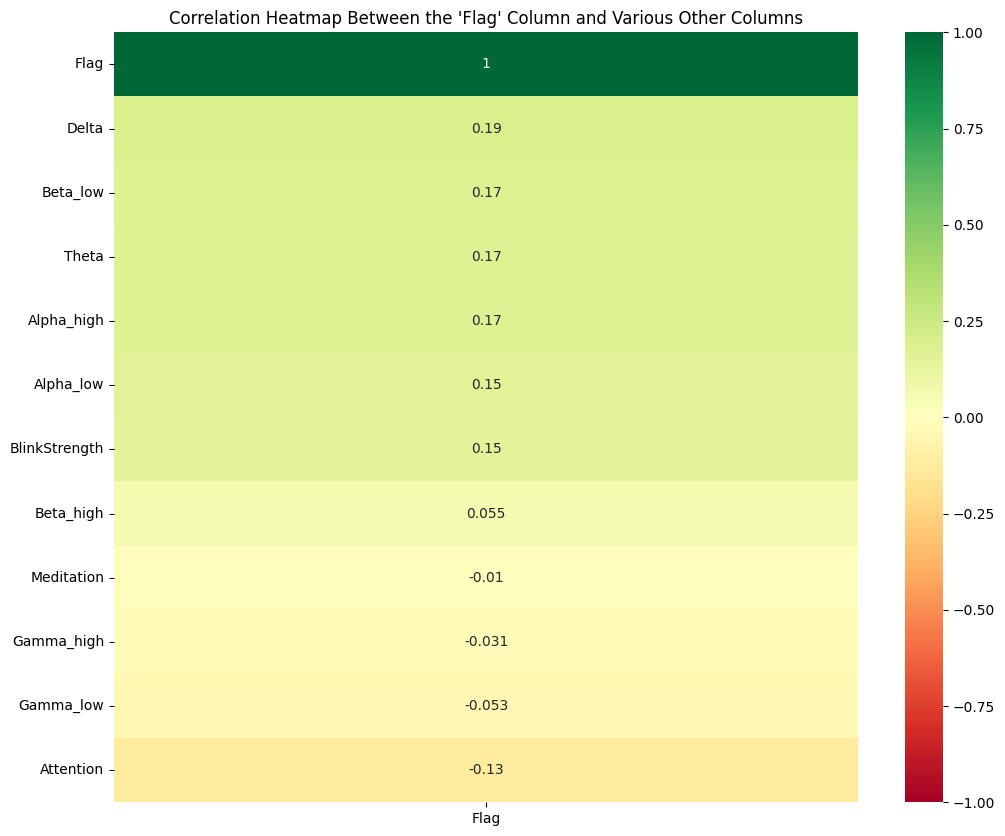

In [21]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr()[['Flag']].sort_values(by='Flag', ascending=False), vmin=-1, vmax=1,annot = True, cmap = 'RdYlGn')
plt.title("Correlation Heatmap Between the 'Flag' Column and Various Other Columns")
plt.show()

<a id = 4></a>
# 4. Logistic Regression
With the dataset now cleaned, we can proceed to the final phase of this project, which involves implementing logistic regression.

In [22]:
X = data.drop(['Flag'], axis=1)
X

Delta   Theta  Alpha_low  Alpha_high  Beta_low  Beta_high  Gamma_low  \
0     785389  114375      30706       26120     19437      15479      12243   
1     386949   80792      23506       22118      9566       7147       5392   
2      21453   14085       4756        5062      2176       2117       2867   
3     322637   56936      17810       25793     15870       8050       3621   
4      19412   12985       6416        6131      7126       7419       2677   
...      ...     ...        ...         ...       ...        ...        ...   
5239   27498    7567       3884        5827      3352       3630       2164   
5240  844780  117394      30706       20344     10194       8320      12243   
5241   80033   32374       7002        4184      9354       6582       4222   
5242  169453   38482      12956       15526     10614       9501       6851   
5243  101407   41010      10225        9336      5673       8286       3421   

      Gamma_high  Attention  Meditation  BlinkStrength  
0           5873         45          91             15  
1           1697          8          42              6  
2            862         48          66              9  
3           2100         25          69              8  
4           1884         80          53             -1  
...          ...        ...         ...            ...  
5239         870         76          78             -1  
5240        5056         29          72              8  
5241        1944         61          53             15  
5242        2335         62          87             16  
5243        1842         48          37             -1  

[4781 rows x 11 columns]

In [23]:
y = data['Flag']
y

0       1
1       0
2       1
3       0
4       1
       ..
5239    0
5240    1
5241    0
5242    0
5243    1
Name: Flag, Length: 4781, dtype: int64

In [24]:
# Perform the train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,stratify = y)

In [42]:
%%time
params = [{'max_iter': [x for x in range(400,2000,100)]}]

grid = GridSearchCV(
    LogisticRegression(),
    param_grid = params,
    scoring = 'f1'
)
grid.fit(X_train, y_train)
grid.best_params_



CPU times: total: 438 ms
Wall time: 7.49 s


{'max_iter': 400}

In [52]:
clf = LogisticRegression().fit(X_train,y_train)


In [53]:
y_preds = clf.predict(X_test)

In [54]:
clf.score(X_test, y_test)

0.6362876254180602

In [55]:
cm = confusion_matrix(y_test,y_preds, labels = clf.classes_)

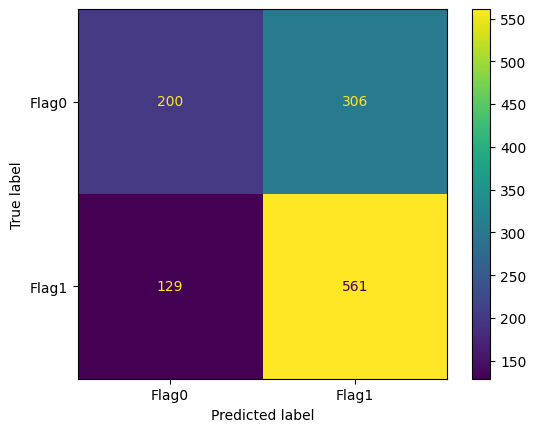

In [57]:
dsp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Flag0', 'Flag1'],)
dsp.plot()

In [59]:
print(classification_report(y_true = y_test, y_pred = y_preds))
# Low False negatives

              precision    recall  f1-score   support

           0       0.61      0.40      0.48       506
           1       0.65      0.81      0.72       690

    accuracy                           0.64      1196
   macro avg       0.63      0.60      0.60      1196
weighted avg       0.63      0.64      0.62      1196

